# Project 3: Modeling The Solar System
### A colaborative effort of Robert Sutherland, Justin Byrne, Josh Milem, Computational Physics (PHY480), Michigan State University

# Table of Contents

### Learning From Previous Projects

I noticed in project 1 and 2 that I ended up copying a lot of code only to make slight modifications.  That process is effective, but it's really sloppy and I think it makes my reports look a little less professional.  I would like to take advantage of the object-orientation in this project to create blocks of code which I can call when I need them.  This should reduce the length of my report and make it more readable.

Also, I should put all of my imports in one header box of code so I don't have to use them over and over and I should encase my RK4 solver in it's own box as well and just call it when I need it.

Also, I found this super cool matplotlib reference page:
http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

## Preliminary Theory


## A Simple Example Using the Runge-Kutta 4 Solver

Here we will call upon the Runge-Kutta 4 solver to solve the equation for Hooke's law, which describes a mass on a spring.

$$m\frac{d^2x}{dt^2}=-kx(t)\hspace{1.5cm}(1)$$

We chose this equation because the analytical solution is know and can be arrived at fairly easily with some basic calculus.  In order to solve eq(1) we can rewrite it in a more suggestive form.

$$\frac{d^2x}{dt^2}=-\frac{k}{m}x(t)\hspace{1.5cm}(2)$$

Following tradition we define $\omega=\sqrt{k/m}$.  eq(2) then becomes

$$\frac{d^2x}{dt^2}=-\omega^2x(t)\hspace{1.5cm}(3)$$

which lends itself nicely to a solutions of the form $x=Asin(\omega t+\phi)$ or $Acos(\omega t+\phi)$.  For our particular case, let's set the phase constant $\phi=0$ and further impose the condition that x(0) = 0.  This fixes our solution to 

$$x(t)=Asin(\omega t)$$

The velocity is also fairly obvious...

$$v(t)=\omega Acos(\omega t)$$

Invoking a little bit of physical foresight I would like to write

$$v(t)=V_0cos(\omega t)$$

I will write eq(1) in terms of velocity so that the problem we attempt can be first order.  Just to be clear our initial goal will be to solve for the $\textit{velocity}$, then we can use the velocity and the time step to get our new value for x and iterate.

$$v'(t)=-\omega^2x(t)\hspace{1.5cm}(4)$$

In the following cell I will attempt now to arrive at the same solutions for the velocity and position using the Runge-Kutta 4 methods discussed in lecture and in section 8.4 of the lecture notes.  I define $A$ and $\omega$ so that the function has a period of $2\pi$.  So we have the parameters 

$$A=1 \hspace{1.5cm} \omega=1$$

I will also stick with the initial conditions discussed here in my code.

In [2]:
#Let's put everything we'll need to import in one cell this time
from array import *
import math 
import numpy as np

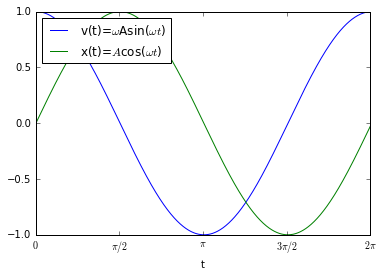

In [56]:
'''
Let n be the number of steps
t_0 and t_f represent initial and final times respectively
The step size h is then (t_f-t_0)/n

Also, I am going to try following Mathematica's Convention
of marking functions with capitals
'''
#Define time interval & step size
#Starting at t=0
t_0=0;t_f=2*math.pi
n=1000
h=(t_f-t_0)/n

#Vectorize time, position, and velocity
t_vec=np.zeros(n)
x_vec=np.zeros(n)
v_x_vec=np.zeros(n)
i=1
while i<=n:
    t_vec[i-1]=t_0+i*h
    i=i+1
#print(t_vec)


#Set the value of omega (w) and A, for convenience both are 1 by default
w=1;A=1
#Initialize eq(4)
def Vprime_x(x_in):
    return -w**2*A*x_in

#Specify our initial conditions v_0=A
v_x_vec[0]=x_0=0;x_vec[0]=v_x0=A;t_0=0.0


'''
-------------------------------
Our Runge-Kutta Solver is here.
-------------------------------
'''
def RK4(f,x_rk,v_rk):
    global x,v_x
    #Solve for the velocity
    k1=h*f(x_rk)
    k2=h*f(x_rk+k1/2)
    k3=h*f(x_rk+k2/2)
    k4=h*f(x_rk+k3)
    v_x = v_rk+(k1+2*k2+2*k3+k4)/6
    #Use velocity to solve for x at t=t+1
    x=x_rk+h*v_x+(h**2/2)*f(v_rk)

#Step 1 goes outside of loop
RK4(Vprime_x,x_0,v_x0)
x_vec[1]=x
v_x_vec[1]=v_x

#Now just loop, storing variables in array
j=2
while j < n:
    RK4(Vprime_x,x_vec[j-1],v_x_vec[j-1])
    x_vec[j]=x
    v_x_vec[j]=v_x
    #print(x,v_x)
    j=j+1

#Plotting
from pylab import *
%matplotlib inline
xlabel("t")
ylabel("")
axes = plt.gca()
axes.set_xlim([0,2*math.pi])
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
axes.set_ylim([-A,A])
title(" ")
#You can add a plot legend instead of just hacking one into the title
plot(t_vec,v_x_vec,label="v(t)=$\omega$Asin($\omega t$)")
plot(t_vec,x_vec,label="x(t)=$A$cos($\omega t$)")
plt.legend(loc='upper left')
#Suppress output from plotting section
print("")

## Runge-Kutta 4 Function

Alright!  So we can see clearly from the plot above that the solver is working properly.  Now that we have the pragmatism out of the way, it's worth giving a theoretical overview of how and why the above solver actually works.